Network

In [ ]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Open the text file
with open('facebook_combined.txt', 'r') as file:
    for line in file:
        # Split the line into two nodes
        node1, node2 = map(int, line.split())

        # Add an edge to the graph
        G.add_edge(node1, node2)

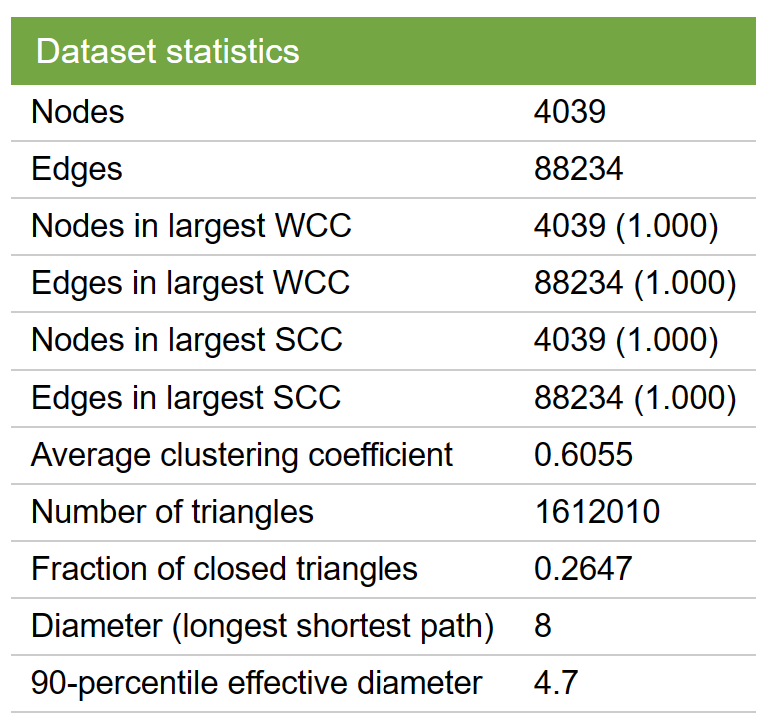

In [ ]:
import networkx as nx

# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average degree: {avg_degree}")

# Check if the graph is connected
is_connected = nx.is_strongly_connected(G)
print(f"Is the graph strongly connected? {is_connected}")

# Get the strongly connected components
scc = nx.strongly_connected_components(G)
print(f"Strongly connected components: {list(scc)}")

# Diameter of the graph (longest shortest path)
# Note: this only works if the graph is connected
if is_connected:
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
else:
    print("The graph is not connected, so it does not have a diameter.")

Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Is the graph strongly connected? False
Strongly connected components: [{332}, {341}, {323}, {329}, {340}, {347}, {339}, {342}, {345}, {322}, {290}, {331}, {324}, {315}, {291}, {297}, {334}, {338}, {308}, {325}, {304}, {280}, {303}, {314}, {313}, {285}, {294}, {344}, {311}, {277}, {168}, {346}, {320}, {309}, {284}, {281}, {272}, {276}, {298}, {318}, {271}, {265}, {268}, {261}, {252}, {295}, {239}, {232}, {330}, {302}, {266}, {300}, {299}, {254}, {249}, {242}, {248}, {317}, {158}, {238}, {240}, {222}, {246}, {223}, {211}, {270}, {203}, {258}, {257}, {236}, {224}, {274}, {200}, {212}, {231}, {288}, {199}, {213}, {161}, {208}, {188}, {185}, {169}, {176}, {221}, {186}, {250}, {260}, {170}, {142}, {123}, {202}, {570}, {557}, {555}, {565}, {682}, {679}, {685}, {678}, {639}, {683}, {1891}, {1911}, {1902}, {1898}, {1888}, {1879}, {1864}, {1845}, {1843}, {1849}, {1861}, {1900}, {1868}, {1842}, {1886}, {1909}, {1839}, 

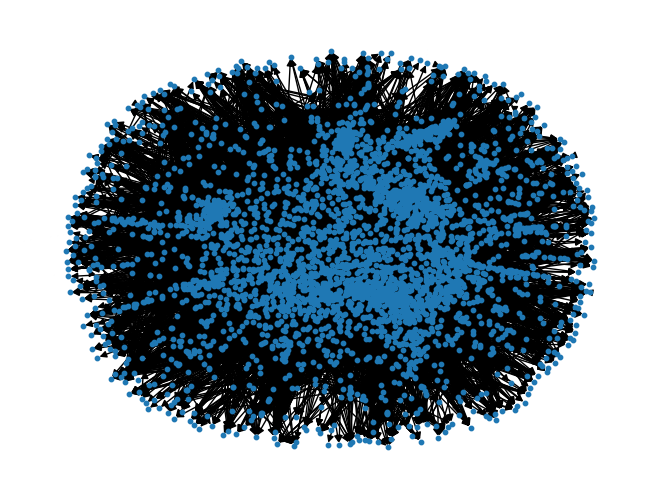

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=False, node_size=10)

# Show the plot
plt.show()


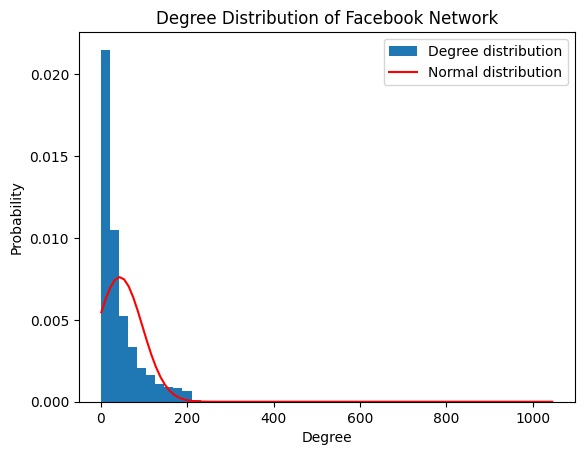

In [ ]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import norm

# Initialize a directed graph
G = nx.DiGraph()

# Open the text file
with open('facebook_combined.txt', 'r') as file:
    for line in file:
        # Split the line into two nodes
        node1, node2 = map(int, line.split())
        # Add an edge to the graph
        G.add_edge(node1, node2)

# Get the degree distribution of the graph
degrees = [G.degree(n) for n in G.nodes()]

# Plot the histogram of the degrees
plt.hist(degrees, bins=50, density=True, label='Degree distribution')

# Calculate the mean and standard deviation of the degrees
mean = np.mean(degrees)
std = np.std(degrees)

# Plot the normal distribution curve with the same mean and standard deviation
x = np.linspace(min(degrees), max(degrees), 100)
plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal distribution')

# Add some labels and a legend to the plot
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution of Facebook Network')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('gossiper_opinions_facebook.csv')

# Extract the 'opinion' data as a vector
opinion_vector = df['0'].values
opinion_vector.shape

(4039,)

In [ ]:
import numpy as np

# Assuming opinion_vector is your original vector
opinion_vector = np.array(opinion_vector)

# Normalize the vector
normalized_vector = (opinion_vector - np.min(opinion_vector)) / (np.max(opinion_vector) - np.min(opinion_vector))

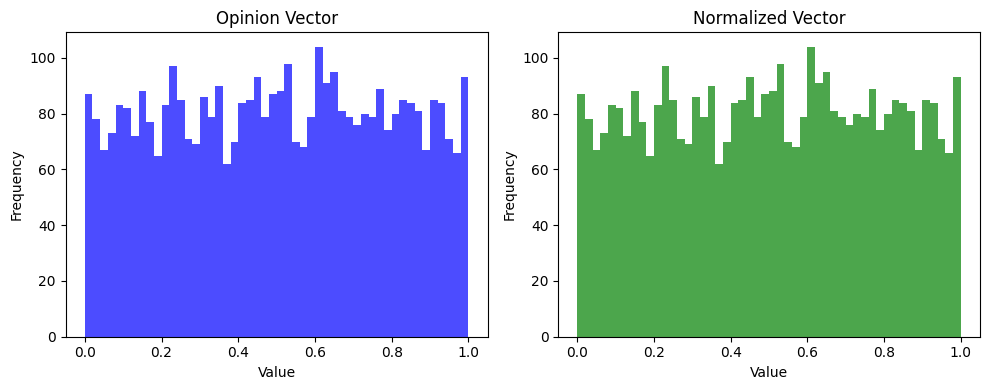

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the opinion_vector
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(opinion_vector, bins=50, color='blue', alpha=0.7)
plt.title('Opinion Vector')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a histogram for the normalized_vector
plt.subplot(1, 2, 2)
plt.hist(normalized_vector, bins=50, color='green', alpha=0.7)
plt.title('Normalized Vector')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
max(normalized_vector)

1.0

In [ ]:
min(normalized_vector)

0.0

In [ ]:
normalized_vector.mean()

0.5026160191457346

Distributed Optimization

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load your network
G = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# Initialize node data
for i, node in enumerate(G.nodes()):
    G.nodes[node]['value'] = normalized_vector[i]  # Initial value from normalized vector
    G.nodes[node]['objective'] = 1  # Set objective function to 1 for all nodes

# Parameters
alpha = 0.01  # Learning rate
num_iterations = 2000 # Number of iterations

# Prepare lists to store the sum of all agent values per iteration
sum_values = []

# Prepare lists to store the opinions of 10 random agents per iteration
opinions = {node: [] for node in np.random.choice(G.nodes(), size=10, replace=False)}

# Distributed optimization algorithm
for _ in range(num_iterations):
    sum_value = 0
    for node in G.nodes():
        # Compute the gradient of the local objective function
        gradient = 2 * (G.nodes[node]['value'] - G.nodes[node]['objective'])

        # Update the node's value
        G.nodes[node]['value'] -= alpha * gradient

        # Average the node's value with its neighbors' values
        G.nodes[node]['value'] = np.mean([G.nodes[neighbor]['value'] for neighbor in G.neighbors(node)])

        # Add the node's value to the sum
        sum_value += G.nodes[node]['value']

        # Store the opinions of the selected agents
        if node in opinions:
            opinions[node].append(G.nodes[node]['value'])

    # Append the sum of all agent values to the list
    sum_values.append(sum_value)

# Prepare lists to store the final values and the opinion vector values
final_values = [G.nodes[node]['value'] for node in G.nodes()]
opinion_vector_values = [G.nodes[node]['objective'] for node in G.nodes()]

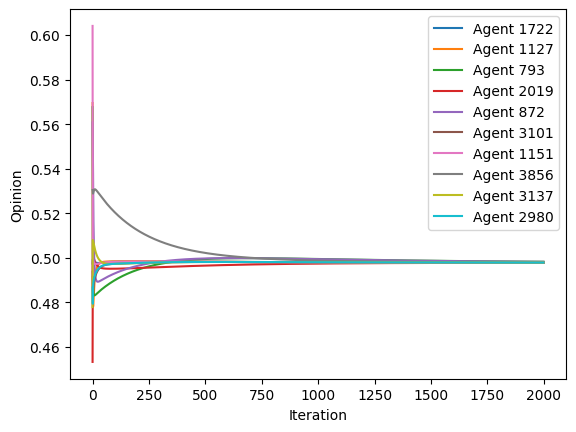

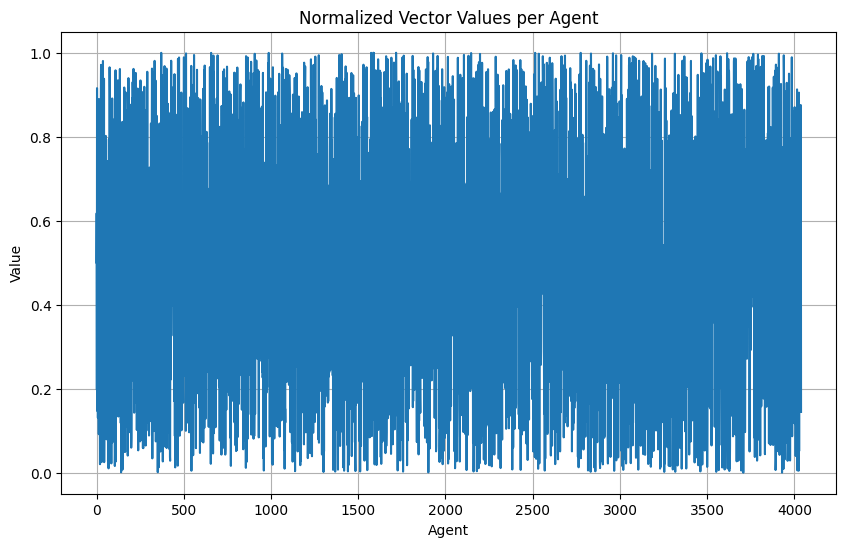

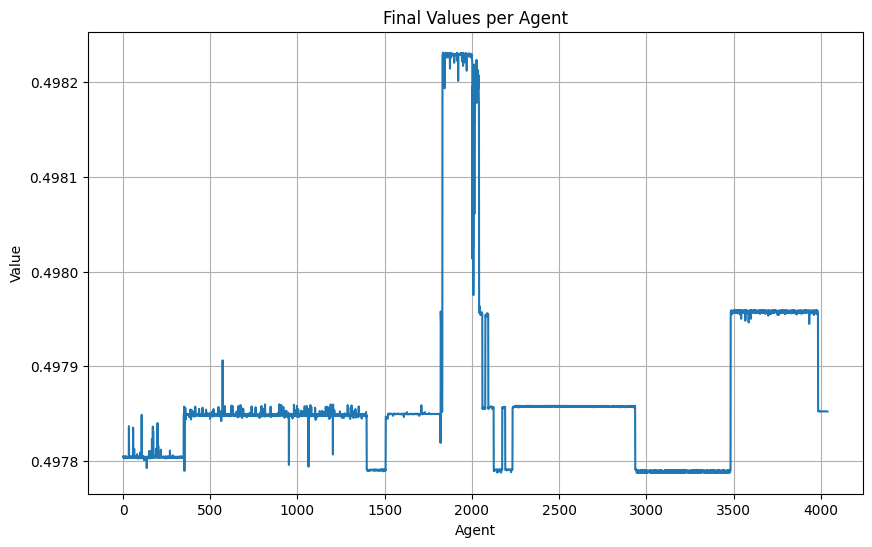

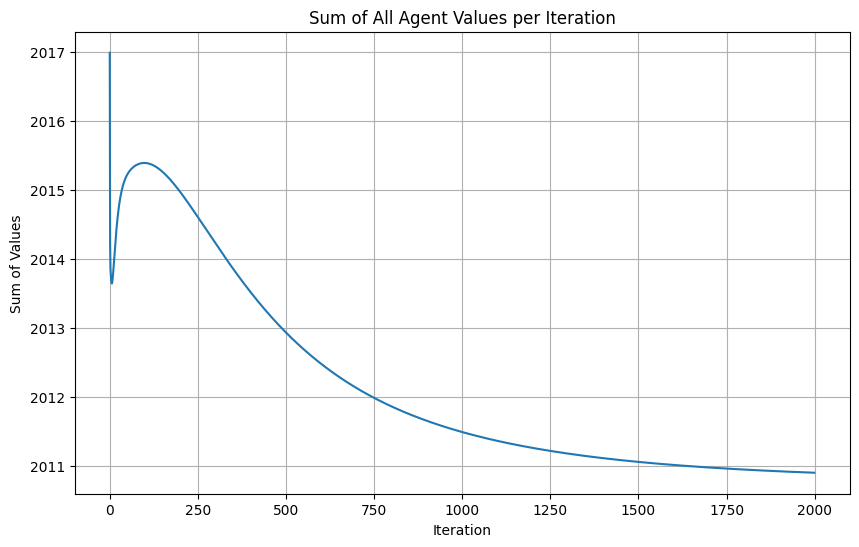

In [ ]:
# Plot the opinions of the selected agents over time
for node, opinion in opinions.items():
    plt.plot(opinion, label=f'Agent {node}')
plt.xlabel('Iteration')
plt.ylabel('Opinion')
plt.legend()
plt.show()

# Plot the normalized vector values per agent
plt.figure(figsize=(10, 6))
plt.plot(normalized_vector)
plt.title('Normalized Vector Values per Agent')
plt.xlabel('Agent')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the final values per agent
plt.figure(figsize=(10, 6))
plt.plot(final_values)
plt.title('Final Values per Agent')
plt.xlabel('Agent')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot the sum of all agent values per iteration
plt.figure(figsize=(10, 6))
plt.plot(sum_values)
plt.title('Sum of All Agent Values per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Sum of Values')
plt.grid(True)
plt.show()

Consensus Algorithm

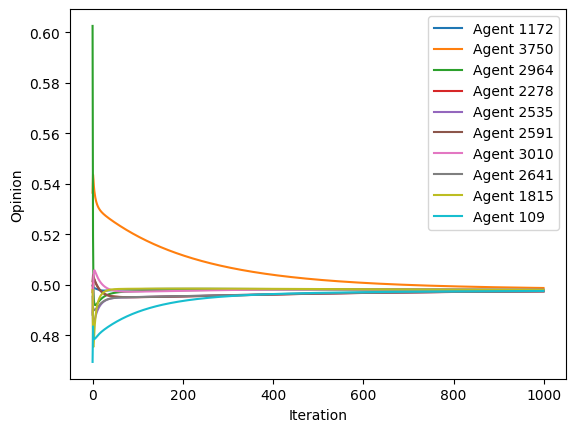

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the consensus function
def consensus(G, max_iter=1000, tol=1e-6):
    # Initialize the values
    for i, node in enumerate(G.nodes()):
        G.nodes[node]['value'] = normalized_vector[i]

    # Select 10 random agents
    agents = np.random.choice(G.nodes(), size=10, replace=False)

    # Initialize a list to store the agents' opinions
    opinions = [[] for _ in range(10)]

    # Iterate until convergence or max iterations
    for _ in range(max_iter):
        # Keep track of the old values
        old_values = np.array([G.nodes[node]['value'] for node in G.nodes()])

        # Update each node's value based on its neighbors
        for node in G.nodes():
            G.nodes[node]['value'] = np.mean([G.nodes[neighbor]['value'] for neighbor in G.neighbors(node)])

        # Store the selected agents' opinions
        for i, agent in enumerate(agents):
            opinions[i].append(G.nodes[agent]['value'])

        # Check for convergence
        new_values = np.array([G.nodes[node]['value'] for node in G.nodes()])
        if np.linalg.norm(old_values - new_values) < tol:
            break

    # Plot the opinions of the selected agents
    for i, opinion in enumerate(opinions):
        plt.plot(opinion, label=f'Agent {agents[i]}')
    plt.xlabel('Iteration')
    plt.ylabel('Opinion')
    plt.legend()
    plt.show()

    # Return the final values
    return new_values

# Run the consensus algorithm
final_values = consensus(G)

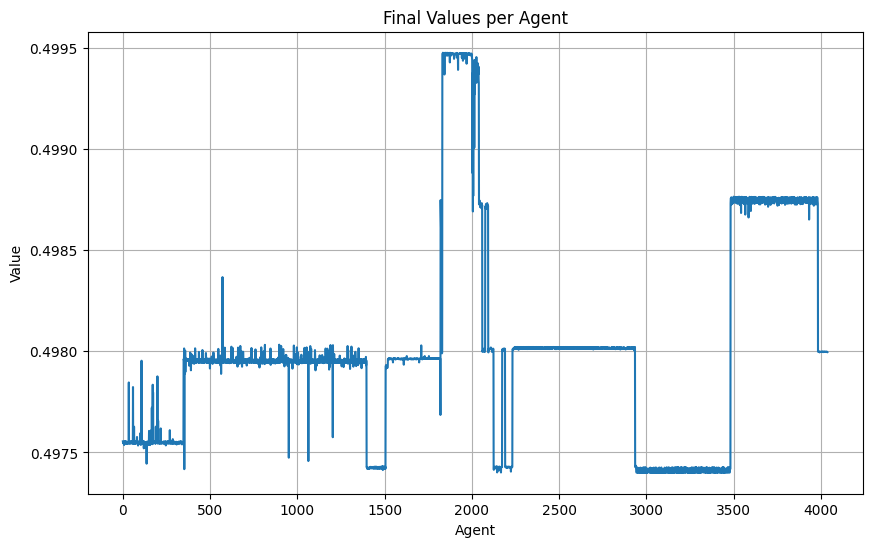

In [ ]:
# Plot the final values per agent
plt.figure(figsize=(10, 6))
plt.plot(final_values)
plt.title('Final Values per Agent')
plt.xlabel('Agent')
plt.ylabel('Value')
plt.grid(True)
plt.show()